# check - missing length data in 2019
* looks to have imported correctly
* confirmed in MS Excel

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import LogNorm

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

# import files
df_LF = pd.read_pickle('gaspereau_lengthfrequency.pickle')
df_FD = pd.read_pickle('gaspereau_fishdetails.pickle')
df_SD = pd.read_pickle('gaspereau_sample.pickle')

# cleaned data

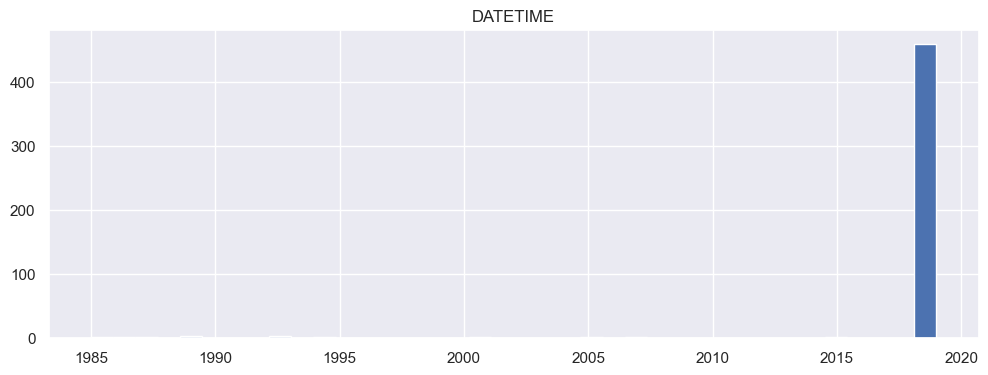

In [36]:
# why so many null lengths in 2019?
pd.DataFrame(df_FD[df_FD.fish_length.isnull()].DATETIME.dt.year).hist(figsize=(12,4), bins=2021-1983);

# raw import

In [39]:
dtypes = {
    'YEAR': 'Int32', 
    'MM': 'Int32', 
    'DD': 'Int32', 
    'WEEK': 'Int32', 
    'SITE': 'object', 
    'PERIOD': 'object', 
    'CONDITION': 'object', 
    'FISH_NO': 'Int32', 
    'FL_WET.x': 'object',  # some 'NA', convert to numeric, coerce error to make 'NA' actually null
    'FL_FROZEN.x': 'object',  # some 'NA', convert to numeric, coerce error to make 'NA' actually null
    'FL_STD.x': 'float64',
    'WEIGHT': 'float64',
    'SPECIES': 'object', 
    'SEX': 'object', 
    'MATURITY.x': 'object',  # two entries that at 3?, (also 1 that is 44), convert to numeric, coerce errors
    'GONAD_WEIGHT': 'object',  # some '.' / 'NA', convert to numeric, coerce error to make 'NA' actually null
    'Ager.1': 'object',
    'AGE.1': 'object',  # convert to numeric and separate text comments
    'FSP.1': 'object',  # convert to numeric and separate text comments
    'Comments.1': 'object', 
    'Ager.2': 'object',  
    'AGE.2': 'object',  # convert to numeric and separate text comments
    'FSP.2': 'object',  # convert to numeric and separate text comments
    'Comments.2': 'object', 
    'Ager.3': 'object', 
    'AGE.3': 'object',  # convert to numeric and separate text comments
    'FSP.3': 'object',  # convert to numeric and separate text comments
    'Comments.3': 'object', 
    'Envelop Comments': 'object'
} 

rawFD = pd.read_excel('Gaspereau Ages_Combined.xlsx', dtype=dtypes)

rawFD['DATETIME'] = pd.to_datetime(rawFD['YEAR'].astype(str) + '-' + rawFD['MM'].astype(str) + '-' + rawFD['DD'].astype(str))

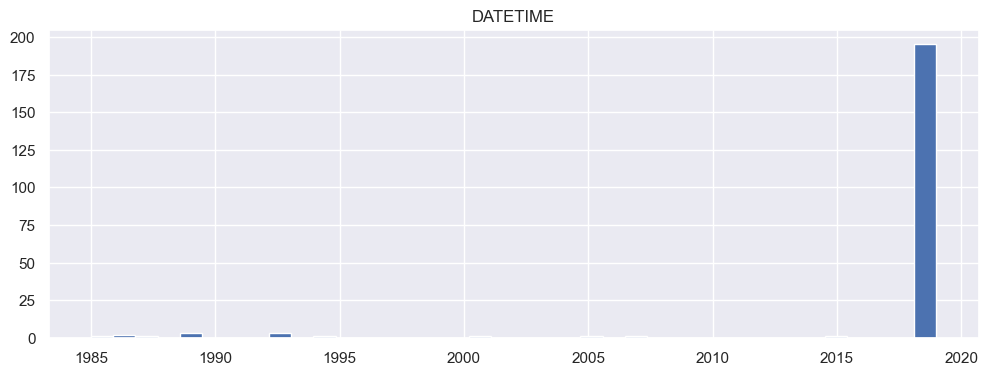

In [40]:
pd.DataFrame(rawFD[rawFD['FL_WET.x'].isnull() & rawFD['FL_FROZEN.x'].isnull() & rawFD['FL_STD.x'].isnull()].DATETIME.dt.year).hist(figsize=(12,4), bins=2021-1983);

In [44]:
rawFD[rawFD['FL_WET.x'].isnull() & rawFD['FL_FROZEN.x'].isnull() & rawFD['FL_STD.x'].isnull()].describe()

,Unnamed: 0,YEAR,MM,DD,WEEK,FISH_NO,FL_STD.x,WEIGHT
count,210.000,210.000,210.000,210.000,102.000,210.000,0.000,3.000
mean,33356.010,2017.224,5.490,24.462,8.353,17.086,NaN,213.300
std,6498.889,6.823,0.501,5.318,1.059,9.860,NaN,22.108
min,2423.000,1985.000,5.000,1.000,3.000,1.000,NaN,188.900
25%,34832.250,2019.000,5.000,25.000,7.000,9.000,NaN,203.950
50%,34884.500,2019.000,5.000,25.000,9.000,17.000,NaN,219.000
75%,35266.750,2019.000,6.000,28.000,9.000,25.000,NaN,225.500
max,35355.000,2019.000,6.000,31.000,9.000,39.000,NaN,232.000


In [43]:
rawFD[rawFD['FL_WET.x'].isnull() & rawFD['FL_FROZEN.x'].isnull() & rawFD['FL_STD.x'].isnull()]

,Unnamed: 0,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET.x,FL_FROZEN.x,FL_STD.x,WEIGHT,SPECIES,SEX,MATURITY.x,GONAD_WEIGHT,Ager.1,AGE.1,FSP.1,Comments.1,Ager.2,AGE.2,FSP.2,Comments.2,Ager.3,AGE.3,FSP.3,Comments.3,Envelop.Comments,DATETIME
2422,2423.000,1985,6,5,<NA>,12,NaN,Frozen,39,NaN,NaN,NaN,NaN,A,F,2,65.800,NaN,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-06-05
2948,2949.000,1986,5,26,<NA>,12,NaN,Frozen,2,NaN,NaN,NaN,NaN,A,M,2,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986-05-26
3011,3012.000,1986,5,29,<NA>,12,NaN,Frozen,1,NaN,NaN,NaN,NaN,B,F,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986-05-29
4038,4039.000,1987,5,8,<NA>,12,NaN,Frozen,8,NaN,NaN,NaN,219.000,A,U,2,NaN,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987-05-08
6285,6286.000,1989,5,23,<NA>,9,PM,Frozen,19,NaN,NaN,NaN,NaN,A,U,NaN,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989-05-23
6294,6295.000,1989,5,23,<NA>,9,PM,Frozen,27,NaN,NaN,NaN,NaN,A,U,NaN,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989-05-23
6295,6296.000,1989,5,23,<NA>,9,PM,Frozen,28,NaN,NaN,NaN,NaN,A,F,4,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989-05-23
10519,10520.000,1993,5,18,<NA>,33,PM,Frozen,28,NaN,NaN,NaN,NaN,U,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-05-18
10582,10583.000,1993,5,20,<NA>,12,AM,Frozen,27,NaN,NaN,NaN,NaN,U,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-05-20
11242,11243.000,1993,5,31,<NA>,60,PM,Frozen,20,NaN,NaN,NaN,232.000,A,F,5,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-05-31
